In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from prettytable import PrettyTable


In [2]:
car_df = pd.read_csv('train.csv')

In [3]:
car_df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [4]:
car_df.shape

(19237, 18)

In [5]:
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

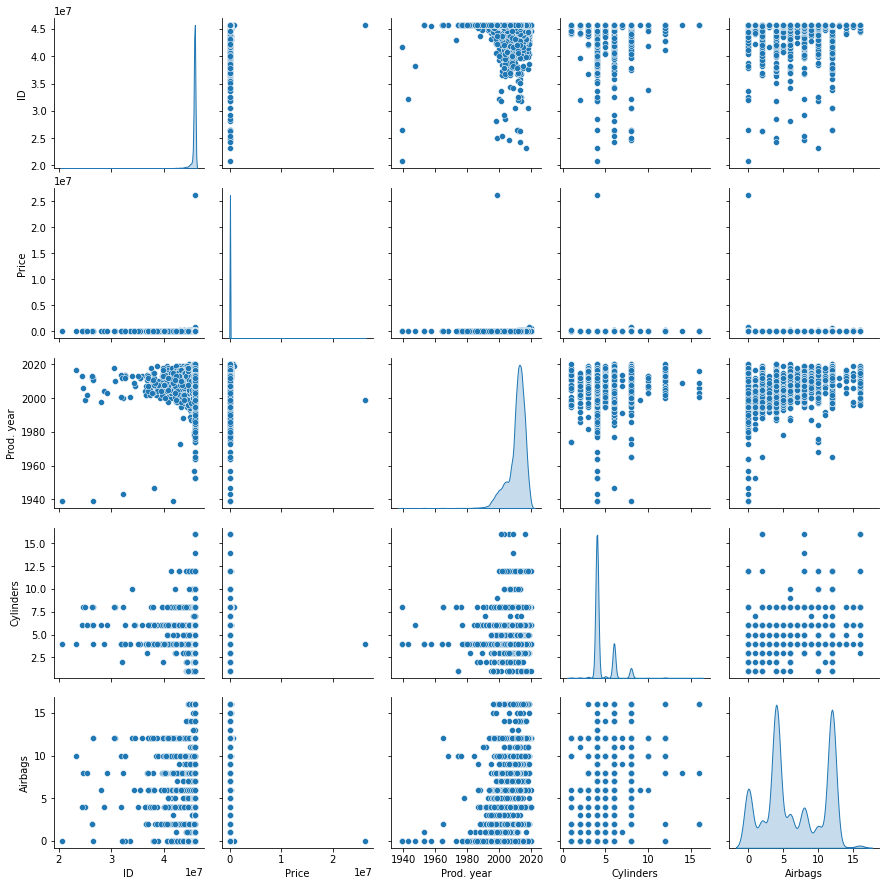

In [7]:
sns.pairplot(car_df, diag_kind='kde')

In [8]:
car_df.drop('ID', axis=1, inplace=True)

In [9]:
car_df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [10]:
car_df['Levy'] = car_df['Levy'].replace('-', np.nan)

In [11]:
car_df['Levy'] = car_df['Levy'].astype(float)

In [12]:
leavy_mean = 0

car_df['Levy'].fillna(leavy_mean, inplace=True)

In [13]:
car_df['Levy'] = round(car_df['Levy'], 2)

In [14]:
milleage_formats = set()

def get_milleage_format(x):

    x = x.split(' ')[1]

    milleage_formats.add(x)

In [15]:
car_df['Mileage'].apply(lambda x:get_milleage_format(x))
milleage_formats

{'km'}

In [16]:
car_df['Mileage'] = car_df['Mileage'].apply(lambda x:x.split(' ')[0])

In [17]:
car_df['Mileage'] = car_df['Mileage'].astype('int')

In [18]:
car_df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [19]:
car_df['Turbo'] = car_df['Engine volume'].apply(lambda x: 1 if 'Turbo' in str(x) else 0)

In [20]:
car_df['Turbo']

0        0
1        0
2        0
3        0
4        0
        ..
19232    1
19233    0
19234    0
19235    0
19236    0
Name: Turbo, Length: 19237, dtype: int64

In [21]:
car_df['Engine volume'] = car_df['Engine volume'].apply(lambda x:str(x).replace('Turbo', ''))

In [22]:
car_df['Engine volume'] = car_df['Engine volume'].astype(float)

In [23]:
cols = ['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Levy'>

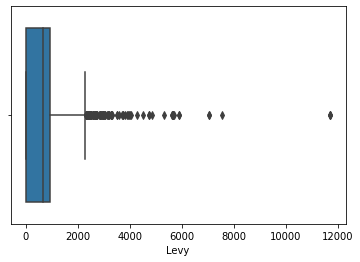

In [24]:
sns.boxplot(car_df[cols[0]])

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine volume'>

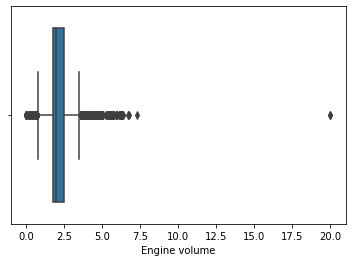

In [25]:
sns.boxplot(car_df[cols[1]])

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

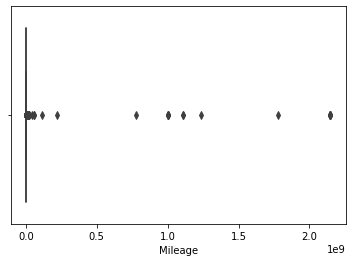

In [26]:
sns.boxplot(car_df[cols[2]])

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cylinders'>

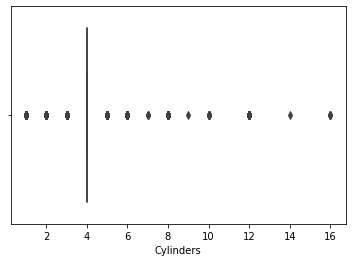

In [27]:
sns.boxplot(car_df[cols[3]])

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Airbags'>

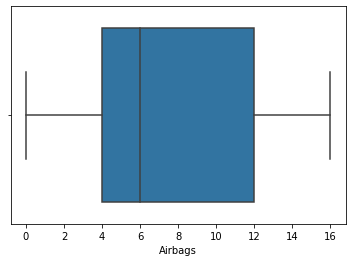

In [28]:
sns.boxplot(car_df[cols[4]])

In [78]:
def outlier_limit(car_df, col):
    print(col)
    print('-'*50)
    q25, q75 = np.percentile(car_df[col], 25), np.percentile(car_df[col], 75)

    iqr = q75 - q25

    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

    cut_off = iqr * 1.5

    lower, upper = q25 - cut_off, q75 + cut_off

    print('Lower: ' ,lower, ' upper:' ,upper)

    return lower, upper

In [79]:
outlier_limit(car_df, cols)

['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']
--------------------------------------------------
Percentiles: 25th=1.800, 75th=12.000, IQR=10.200
Lower:  -13.499999999999998  upper: 27.299999999999997


(-13.499999999999998, 27.299999999999997)

In [92]:
def remove_outlier(car_df, col, upper, lower):

    outliers = [x for x in car_df[col] if x > upper]

    print('Identified outliers: %d' % len(outliers))

    outliers_removed = [x for x in car_df[col] if x >= lower  and x <= upper]

    print('Non-outliers observations: %d' % len(outliers_removed))

    final = np.where(car_df[col] > upper, upper, np.where(car_df[col] < lower, lower, car_df[col]))

    return final

In [93]:
outlier_cols = ['Levy', 'Engine volume', 'Mileage', 'Cylinders']

In [100]:
for col in outlier_cols:
    lower, upper = outlier_limit(car_df, col)
    car_df[col] = remove_outlier(car_df, col, upper, lower)

Levy
--------------------------------------------------
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Lower:  0.0  upper: 0.0
Identified outliers: 0
Non-outliers observations: 19237
Engine volume
--------------------------------------------------
Percentiles: 25th=1.800, 75th=1.800, IQR=0.000
Lower:  1.8  upper: 1.8
Identified outliers: 0
Non-outliers observations: 19237
Mileage
--------------------------------------------------
Percentiles: 25th=70139.000, 75th=70139.000, IQR=0.000
Lower:  70139.0  upper: 70139.0
Identified outliers: 0
Non-outliers observations: 19237
Cylinders
--------------------------------------------------
Percentiles: 25th=4.000, 75th=4.000, IQR=0.000
Lower:  4.0  upper: 4.0
Identified outliers: 0
Non-outliers observations: 19237


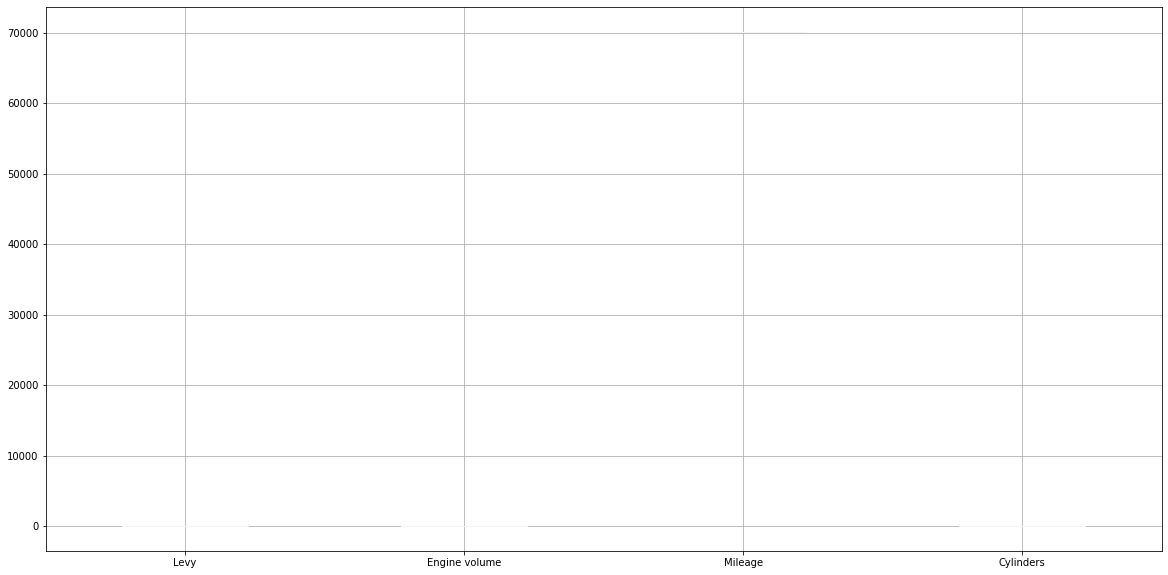

In [110]:
plt.figure(figsize=(20, 10))
car_df[outlier_cols].boxplot()

In [158]:
car_df['Doors'].unique()

array(['nan'], dtype=object)

In [ ]:
car_df['Doors'] = car_df['Doors'].map({'04-May':'4_5', '02_Mar':'2_3', '>5':'5'})
car_df['Doors'] = car_df['Doors'].astype(str)

In [161]:
car_df['Mileage_bin'].unique()

array([70139.])

In [115]:
label = [0,1,2,3,4,5,6,7,8,9]
car_df['Mileage_bin'] = pd.cut(car_df['Mileage'], len(label), labels=label)
car_df['Mileage_bin'] = car_df['Mileage'].astype(float)

In [160]:
car_df['EV_bin'].unique()

array([2.])

In [159]:
labels_1 = [0,1,2,3,4]
car_df['EV_bin'] = pd.cut(car_df['Engine volume'], len(labels_1), labels=labels_1)
car_df['EV_bin'] =  car_df['EV_bin'].astype(float)

In [123]:
numerical_df = car_df.select_dtypes(include=np.number)
categorical_df = car_df.select_dtypes(include=object)

encoder = OrdinalEncoder()

categorical_cols = categorical_df.columns.tolist()

encoder.fit(categorical_df[categorical_cols])

categorical_encoded = encoder.transform(categorical_df[categorical_cols])

categorical_encoded = pd.DataFrame(categorical_encoded, columns=categorical_cols)

categorical_df.reset_index(inplace=True, drop=True)

In [124]:
categorical_encoded.head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
0,32.0,1242.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,12.0
1,8.0,658.0,4.0,0.0,5.0,2.0,0.0,0.0,0.0,1.0
2,21.0,684.0,3.0,0.0,5.0,3.0,1.0,0.0,1.0,1.0
3,16.0,661.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,14.0
4,21.0,684.0,3.0,1.0,5.0,0.0,1.0,0.0,0.0,12.0


In [125]:
numerical_df.reset_index(inplace=True, drop=True)
categorical_encoded.reset_index(inplace=True, drop=True)
final_car_df = pd.concat([numerical_df, categorical_encoded], axis=1)

In [162]:
final_car_df

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Turbo,Mileage_bin,EV_bin,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
0,13328,0.0,2010,1.8,70139.0,4.0,12,0,70139.0,2.0,32.0,1242.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,12.0
1,16621,0.0,2011,1.8,70139.0,4.0,8,0,70139.0,2.0,8.0,658.0,4.0,0.0,5.0,2.0,0.0,0.0,0.0,1.0
2,8467,0.0,2006,1.8,70139.0,4.0,2,0,70139.0,2.0,21.0,684.0,3.0,0.0,5.0,3.0,1.0,0.0,1.0,1.0
3,3607,0.0,2011,1.8,70139.0,4.0,0,0,70139.0,2.0,16.0,661.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,14.0
4,11726,0.0,2014,1.8,70139.0,4.0,4,0,70139.0,2.0,21.0,684.0,3.0,1.0,5.0,0.0,1.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0.0,1999,1.8,70139.0,4.0,5,1,70139.0,2.0,36.0,385.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,12.0
19233,15681,0.0,2011,1.8,70139.0,4.0,8,0,70139.0,2.0,23.0,1334.0,9.0,1.0,5.0,2.0,1.0,0.0,0.0,11.0
19234,26108,0.0,2010,1.8,70139.0,4.0,4,0,70139.0,2.0,23.0,1442.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,7.0
19235,5331,0.0,2007,1.8,70139.0,4.0,4,0,70139.0,2.0,8.0,456.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


<AxesSubplot:>

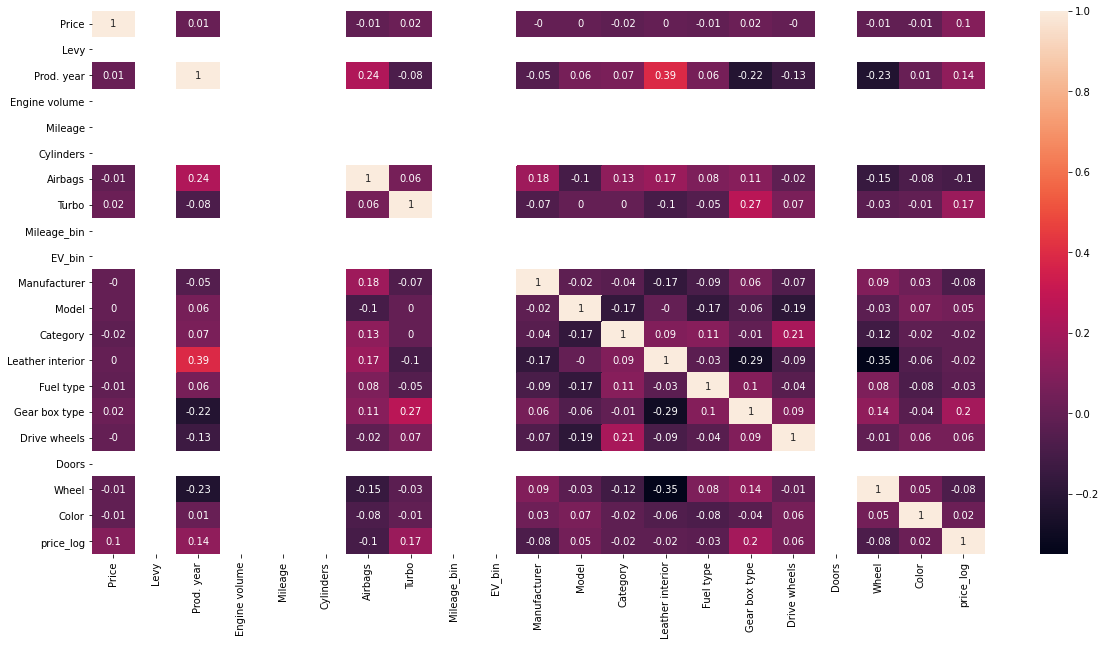

In [119]:
final_car_df['price_log'] = np.log(final_car_df['Price'])
sns.set_palette('pastel')
plt.figure(figsize=(20, 10))

sns.heatmap(round(final_car_df.corr(), 2), annot=True)


In [120]:
cols_dropped = ['Price', 'price_log', 'Cylinders']

final_car_df.columns

x = final_car_df.drop(cols_dropped, axis=1)
y = final_car_df['Price']

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=25)

In [122]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [127]:
def train_ml_model(x,y, model_algo):
    if model_algo == 'lr':
        model = LinearRegression()
    elif model_algo == 'xgb':
        model = XGBRegressor()
    elif model_algo == 'rf':
        model = RandomForestRegressor()

    model.fit(X_train_scaled, np.log(y))

    return model

In [128]:
def evaluate_ml_model(model, x, y):
    
    predictions = model.predict(x)
    predictions = np.exp(predictions)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    mape = mean_absolute_percentage_error(y, predictions)

    mse = round(mse, 2)
    mae = round(mae, 2)
    mape = round(mape, 2)

    return [mse, mae, mape]

In [130]:
model_linear = train_ml_model(X_train_scaled, Y_train, 'lr')
model_xgboost =  train_ml_model(X_train_scaled, Y_train, 'xgb')
model_forest =  train_ml_model(X_train_scaled, Y_train, 'rf')

In [164]:
linear_evaulate =  evaluate_ml_model(model_linear, X_test_scaled, Y_test)
linear_evaulate

[363031607.43, 11465.15, 7.1]

In [165]:
xg_evaluate =  evaluate_ml_model(model_xgboost, X_test_scaled, Y_test)
xg_evaluate

[172994889.01, 6629.16, 4.22]

In [166]:
forest_evaluate = evaluate_ml_model(model_forest, X_test_scaled, Y_test)
forest_evaluate

[128706424.08, 5545.09, 3.61]

In [135]:
model_dl_small = Sequential()

model_dl_small.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
model_dl_small.add(Dense(8, activation='relu'))
model_dl_small.add(Dense(4, activation='relu'))
model_dl_small.add(Dense(1, activation='linear'))

model_dl_small.compile(loss='mean_squared_error', optimizer='adam')

model_dl_small.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                304       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [136]:
epochs = 20
batch_size = 10

In [137]:
from livelossplot import PlotLossesKeras

In [139]:
model_dl_small.fit(X_train_scaled, np.log(Y_train), 
validation_data=(X_test_scaled, np.log(Y_test)),
epochs = epochs,
batch_size= batch_size, 
verbose=0)

In [140]:
history_df = pd.DataFrame(model_dl_small.history.history)

In [142]:
history_df.head(10)

,loss,val_loss
0,9.394494,2.246451
1,2.072488,1.793356
2,1.786560,1.650894
3,1.684501,1.581668
4,1.639370,1.559979
5,1.602110,1.547580
6,1.575399,1.495433
7,1.554781,1.488145
8,1.538402,1.503234
9,1.522858,1.478045


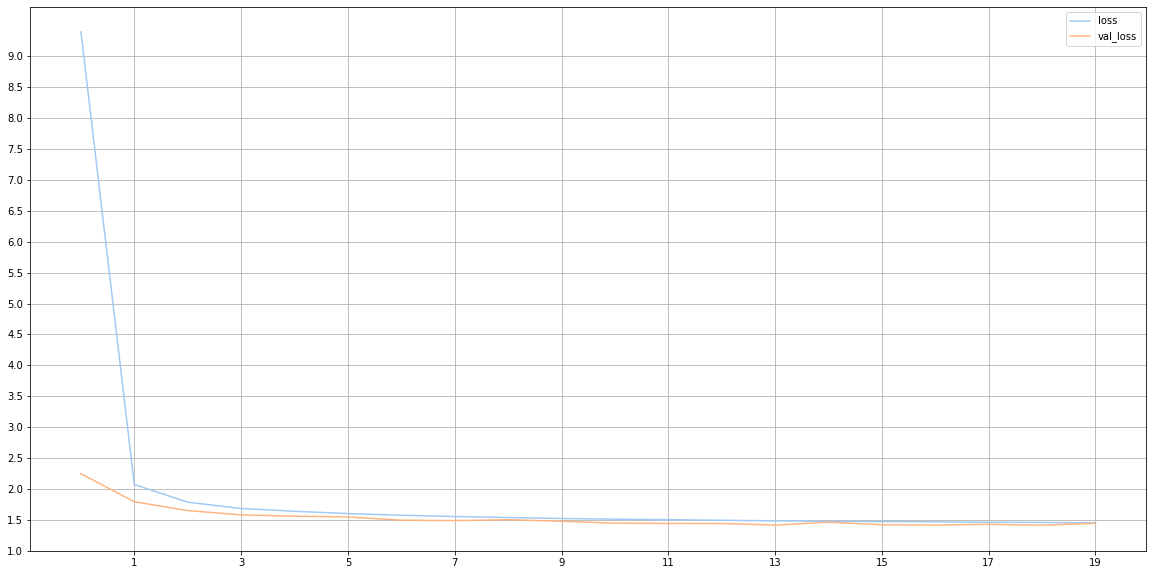

In [147]:
plt.figure(figsize=(20, 10))
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.xticks(np.arange(1, epochs+1, 2))
plt.yticks(np.arange(1, max(history_df['loss']), 0.5))
plt.legend()
plt.grid()

In [148]:
model_dl_large = Sequential()

model_dl_large.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model_dl_large.add(Dense(32, activation='relu'))
model_dl_large.add(Dense(16, activation='relu'))
model_dl_large.add(Dense(1, activation='linear'))

model_dl_large.compile(loss='mean_squared_error', optimizer='adam')

model_dl_large.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                1216      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


In [149]:
epochs = 20
batch_size = 10

In [150]:
model_dl_large.fit(X_train_scaled, np.log(Y_train), 
verbose=0, 
validation_data=(X_test_scaled, np.log(Y_test)), 
epochs=epochs, 
batch_size=batch_size)

In [151]:
history_df = pd.DataFrame(model_dl_large.history.history)

In [152]:
history_df.head(10)

,loss,val_loss
0,4.537783,1.749325
1,1.662237,1.587908
2,1.562132,1.475701
3,1.512877,1.604719
4,1.491362,1.431260
5,1.466444,1.408313
6,1.439455,1.371410
7,1.429351,1.404969
8,1.421278,1.448997
9,1.417137,1.414909


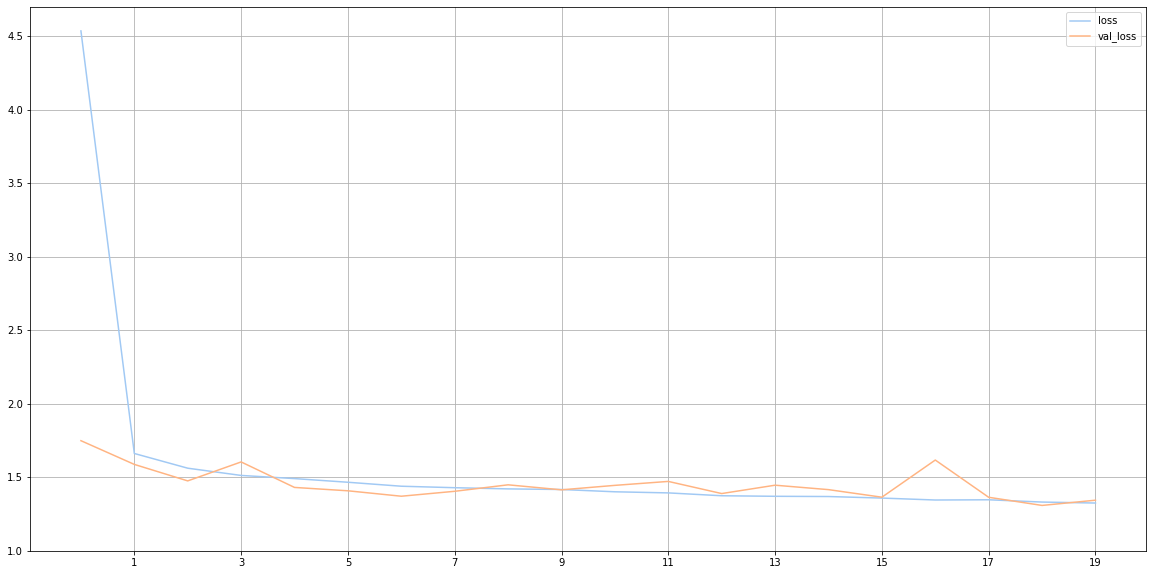

In [153]:
plt.figure(figsize=(20, 10))
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.xticks(np.arange(1, epochs+1, 2))
plt.yticks(np.arange(1, max(history_df['loss']), 0.5))
plt.legend()
plt.grid()

In [167]:
dl_small_evaluate = evaluate_ml_model(model_dl_small, X_test_scaled, Y_test)
dl_small_evaluate

[243435386.32, 8674.97, 4.01]

In [168]:
dl_large_evaluate = evaluate_ml_model(model_dl_large, X_test_scaled, Y_test)
dl_large_evaluate

[190458944.87, 7481.89, 3.98]

In [154]:
summary = PrettyTable(['Model', 'MSE', 'MAE', 'MAPE'])

summary.add_row(['LR']+ evaluate_ml_model(model_linear, X_test_scaled, Y_test))
summary.add_row(['XGB'] + evaluate_ml_model(model_xgboost, X_test_scaled, Y_test))
summary.add_row(['RF'] + evaluate_ml_model(model_forest, X_test_scaled, Y_test))

summary.add_row(['DL_SMALL'] + evaluate_ml_model(model_dl_small, X_test_scaled, Y_test))
summary.add_row(['DL_LARGE'] + evaluate_ml_model(model_dl_large, X_test_scaled, Y_test))

print(summary)

+----------+--------------+----------+------+
|  Model   |     MSE      |   MAE    | MAPE |
+----------+--------------+----------+------+
|    LR    | 363031607.43 | 11465.15 | 7.1  |
|   XGB    | 172994889.01 | 6629.16  | 4.22 |
|    RF    | 128706424.08 | 5545.09  | 3.61 |
| DL_SMALL | 243435386.32 | 8674.97  | 4.01 |
| DL_LARGE | 190458944.87 | 7481.89  | 3.98 |
+----------+--------------+----------+------+


In [155]:
y_pred = np.exp(model_forest.predict(X_test_scaled))

In [156]:
number_of_observations = 20

x_ax = range(len(Y_test[:number_of_observations]))

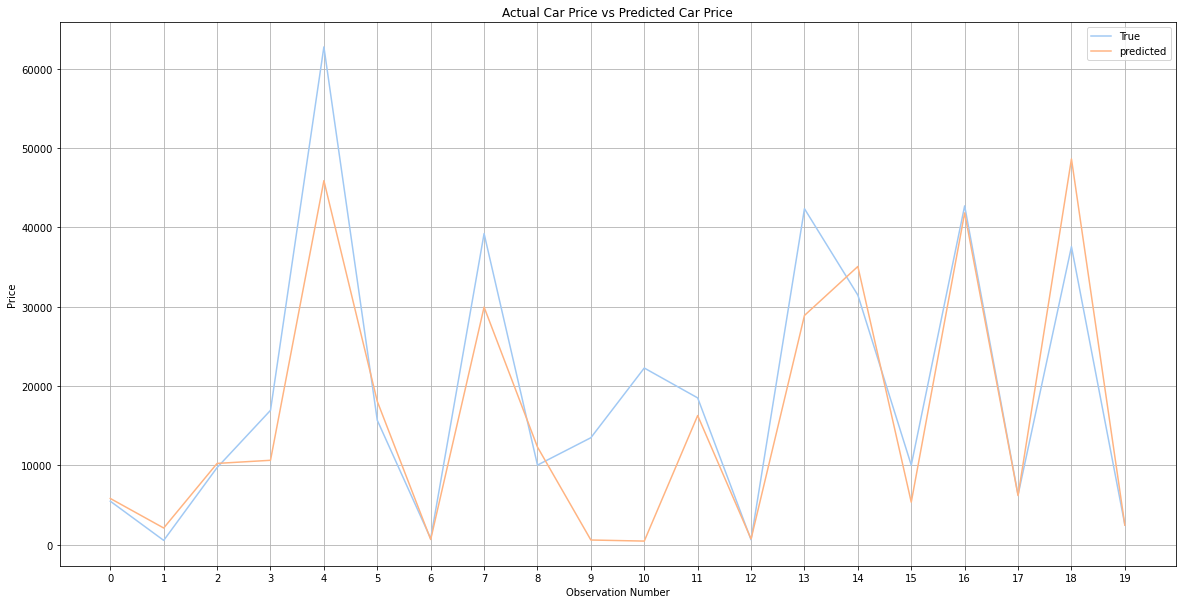

In [157]:
plt.figure(figsize=(20,10))

plt.plot(x_ax, Y_test[:number_of_observations], label='True')
plt.plot(x_ax, y_pred[:number_of_observations], label='predicted')
plt.title('Actual Car Price vs Predicted Car Price')
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()